# Bank Data Analysis
#### Sujay Desai

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

In [2]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>march</i> and <i> may </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into Boolean values in order to run regressions.

In [3]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()
# Removes the index column that comes with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [4]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [5]:
y = data['y']
x1 = data['duration']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


/Users/Sujay/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Apr 2020   Pseudo R-squ.:                  0.2121
Time:                        20:37:09   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

- The dependent variable is 'duration'. The model used is a Logit regression (logistic in common lingo). The method - Maximum Likelihood Estimation (MLE) - has clearly converged after classifying 518 observations. 
- The log likelihood ratio (LLR) p-value ~0 < 0.05, so our model is statistically different from LL-Null, therefore our model is significant.
- The Pseudo R-squared is 0.21 which is within the 'acceptable region' of 0.2 to 0.4. 
- The duration variable is significant and its coefficient is 0.0051.
- The constant is also significant and equals: -1.70

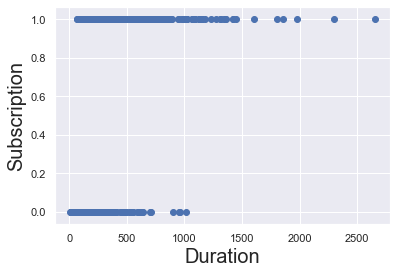

In [7]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Label our axes
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

- Overall, it seems like the longer the bank waits before contacting the client, the better the odds of the client subscribing.

### Find the odds of duration

In [8]:
# the odds of duration are the exponential of the log odds from the summary table
np.exp(0.0051)

1.005113027136717

- The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression (the odds of the client subscribing increase by 0.5%).
- Note that we could have inferred that from the coefficient itself.
- Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [9]:
# To avoid writing them out every time, we save the names of the estimators of our model in a list. 
estimators=['interest_rate','credit','march','previous','duration']

X1_all = data[estimators]
y = data['y']

### Scale the data

In [10]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X1_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# Scale the features and store them in a new variable (the actual scaling procedure)
X1_scaled = scaler.transform(X1_all)

### Train Test Split

In [12]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split each time, use random_state = 365
x1_train, x1_test, y_train, y_test = train_test_split(X1_scaled, y, test_size=0.2, random_state=365)

### Create the regression

In [13]:
x_train = sm.add_constant(x1_train)
reg_logit = sm.Logit(y_train,x_train)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.338064
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.512     
Dependent Variable: y                AIC:              291.9168  
Date:               2020-04-12 20:37 BIC:              316.0720  
No. Observations:   414              Log-Likelihood:   -139.96   
Df Model:           5                LL-Null:          -286.94   
Df Residuals:       408              LLR p-value:      1.9807e-61
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.1163     0.1622    0.7170   0.4734   -0.2015    0.4341
x1        -1.4452     0.1862   -7.7607   0.0000   -1.8102   -1.0802
x2         0.3986     0.2020    1.9731   0.0485    0.0027    0.7945
x3        -0.8967     0.1705   -5.2603   0.0000   -1.2308   -0.5626
x4         0.5087     0.1991    2.5548   0.0106    0.1184    0.8989
x5         2.4048     0.2776    8.6627   0.0000    1.8607    2.9489
=================================================================

"""

### Find the odds of each predictor (before standardizing variables)

In [14]:
# interest rate, credit, march, previous, duration 
print(np.exp(-0.7707), np.exp(2.1763), np.exp(-2.0283), np.exp(1.5255), np.exp(0.0070))

0.46268907257514763 8.813635403916994 0.13155898142186118 4.5974417155800325 1.0070245572668486


- All of the predictors have p-values < 0.05, so they are all relevant/significant to the model.
- It makes sense that interest rate has a negative coefficient since a lower interest rate would make a client more likely to subscribe to the deposit, as they would have to pay less interest. Also, the range of interest rates is only from 0.635% to 4.97%, so it makes sense that for each 1% increase in interest rate, the odds of subscription fall by ~54%.
- Credit seems to have the largest impact on whether or not the client subscribes to the term deposit: if all other variables were kept constant, if the client has enough credit to avoid defaulting, they are almost 800% are likely to subsribe than if they didn't have enough credit, which makes sense. Not having enough credit is a big issue.
- It seems that if the call to the client was made in March, that lowered the odds of subscription by almost 87%, so March must not be a good time of the year to subscribe. More data would be required to understand what is going on in March.
- It makes sense that having a successful previous marketing campaign with the client would increase the odds of subscription by over 350%. If the client did not have a positive experience last time, they would be significantly less likely to subscribe again.
- The odds of duration are still pretty close to 1, so a change in 1 day would barely affect the regression.
- Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude, so the relative importance of variables cannot be analyzed.

### Find the odds of each predictor (after standardizing variables)

In [15]:
# interest rate, credit, march, previous, duration 
print(np.exp(-1.4452), np.exp(0.3986), np.exp(-0.8967), np.exp(0.5087), np.exp(2.4048))

0.23569893205515957 1.4897376043707538 0.40791355582669964 1.6631277229539405 11.076214817683821


- After standardizing, all of the predictors are still significant, but we can see that duration is actually more important than the rest of the predictors.

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

In [16]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [17]:
confusion_matrix(x_train,y_train,results_logit)

(array([[174.,  31.],
        [ 24., 185.]]), 0.8671497584541062)

## Test the model

### Declare the dependent and the independent variables

In [18]:
x_test = sm.add_constant(x1_test)

Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [19]:
# Determine the Confusion Matrix and the accuracy of the model with the new data. Note that the model itself stays the same (results_logit).
# test accuracy
confusion_matrix(x_test, y_test, results_logit)

(array([[48.,  6.],
        [ 7., 43.]]), 0.875)

In [20]:
# Compare these values to the Confusion Matrix and the accuracy of the model with the old data.
# train accuracy
confusion_matrix(x_train,y_train, results_logit)

(array([[174.,  31.],
        [ 24., 185.]]), 0.8671497584541062)

Looking at the test accuracy we see a number which is a tiny bit higher: 87.5%, compared to 86.7% for train accuracy. 

In general, we  expect the test accuracy to be lower than the train one. The test accuracy is higher in this case, but that is just due to luck.